<a href="https://www.kaggle.com/code/sejalhanmante/mobile-price-classification-using-lda-sejal?scriptVersionId=184745595" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


# **About the dataset**

**Columns**

1. Battery_power : capacity in mAh


2. blue : Has bluetooth or not


3. clock_speed : speed at which microprocessor executes instructions


4. dual_sim : Has dual sim support or not


5. fc : Front Camera mega pixels


6. four_g : Is 4g or not 

7. int_memory : Internal Memory in Gigabytes

8. m_dep : mob depth in cms 

9. mobile_wt : weight of phone in gms 

10. n_cores : Number of cores of processor

11. pc : primary camera megapixels 

12. px_height : pixel resolution height 

13. px_width : pixel resolution width

14. ram : capacity 

15. sc_h : screen height 

16. sc_w : screen width 

17. talk_time : in hrs 

18. three_g : Is 3g or not 

19. touch_screen : is touch screen or not 


20. wifi : has wifi or not 


21. price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).
**

In [2]:
df = pd.read_csv(r"/kaggle/input/mobile-price-classification/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
df.shape

(2000, 21)

# EDA

In [5]:
import plotly.express as px 
import seaborn as sns

In [6]:
battery_pricerange = df.groupby("price_range")["battery_power"].agg('mean')
battery_pricerange
px.bar(battery_pricerange,title="Price range acc. to battery power")

In [7]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df['price_range'].unique()

array([1, 2, 3, 0])

<Axes: xlabel='four_g', ylabel='count'>

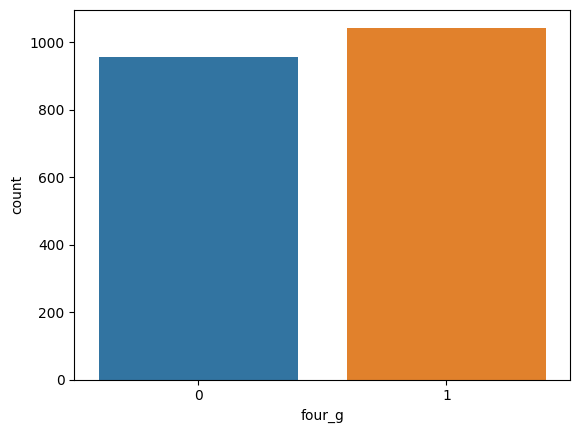

In [9]:
# COUNT OF PHONES HAVING 4G AND NOT 4G 
sns.countplot(x=df["four_g"])

In [10]:
int_mem_price = df.groupby("price_range")["int_memory"].agg('mean')
px.line(int_mem_price,title="Internal memory of phone acc. to price range")


In [11]:
camera_pricerange = df.groupby("price_range")[["fc","pc"]].agg('mean')
px.bar(camera_pricerange,barmode='stack',title="camera megapixel of phone and price range")

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [12]:
ram_price = df.groupby("price_range")["ram"].agg('mean')
px.pie(ram_price,names=ram_price.index,values=ram_price.values,title="RAM CAPACITY ACC. TO PRICE RANGE")

In [13]:
mobwt_price = df.groupby("price_range")["mobile_wt"].agg("mean")
px.bar(mobwt_price,title = "Mobile weight to price range")


<Axes: >

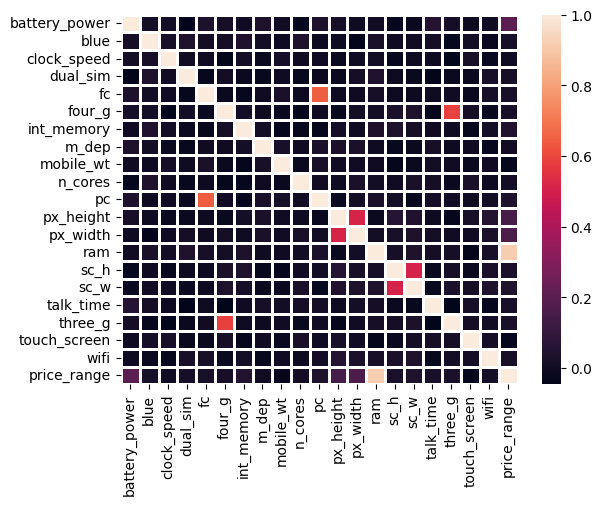

In [14]:
# CORRELATION BETWEEN COLUMNS 
sns.heatmap(df.corr(),linecolor="white",linewidths=1)

No such strong correlation found between the columns

# Data Preprocessing

In [15]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# TRAIN - TEST SPLIT

In [16]:
X = df.drop(["price_range"],axis=1)
y = df["price_range"]

In [17]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape , y_train.shape

((1600, 20), (1600,))

# LDA [LINEAR DISCRIMANT ANALYSIS]

In [18]:
# SCALING THE DATA 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Scaled_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
Scaled_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1.548360,-0.981423,-1.236230,0.970437,0.620111,-1.046060,0.754832,-0.008935,1.425710,-1.547446,0.020269,0.275712,1.181997,-0.580476,-0.528061,0.759509,-1.445123,0.557137,0.990050,1.002503
1,-1.379535,1.018929,0.837112,-1.030464,-0.993561,0.955968,0.919763,-1.403674,-0.046246,1.510316,-1.476497,-0.258762,-0.556547,1.336453,-0.290196,-1.084869,0.915929,0.557137,0.990050,1.002503
2,-0.010914,-0.981423,-0.748385,0.970437,-0.532512,0.955968,1.359577,-1.403674,1.340790,-1.547446,0.685498,-0.285711,-1.020159,-0.657302,0.423400,1.451150,1.642407,0.557137,-1.010051,1.002503
3,-1.043621,-0.981423,-0.504462,-1.030464,-0.532512,-1.046060,0.315017,-0.357620,1.623858,0.199847,-0.478653,-0.764042,0.984962,1.288322,0.185535,0.528962,-1.081884,-1.794892,-1.010051,1.002503
4,0.488416,1.018929,-1.236230,0.970437,0.620111,-1.046060,-1.389265,-0.357620,-1.008680,0.199847,0.352883,0.401470,-0.336332,-0.489767,-1.479523,-0.162680,1.642407,0.557137,-1.010051,1.002503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1.666383,1.018929,0.471228,0.970437,-0.532512,-1.046060,-0.069821,1.385804,0.293436,-1.547446,1.184419,0.293677,0.829652,0.838477,0.185535,-0.162680,1.460787,-1.794892,-1.010051,1.002503
1596,-1.479401,1.018929,-1.236230,-1.030464,-0.763036,0.955968,1.469531,0.688434,0.151902,1.510316,-0.977575,0.257746,1.411485,-1.623634,0.899131,0.990056,-0.900264,0.557137,0.990050,1.002503
1597,1.335009,1.018929,-1.236230,-1.030464,-0.993561,0.955968,-0.949450,-0.357620,0.548198,0.199847,-0.478653,0.190375,0.041512,-0.033443,0.899131,1.220603,0.189452,0.557137,-1.010051,1.002503
1598,1.557438,-0.981423,-0.748385,0.970437,-0.301987,-1.046060,-1.169357,-0.357620,1.397403,1.510316,0.352883,-0.344098,0.595528,0.740363,0.899131,1.220603,1.279168,-1.794892,0.990050,1.002503


In [19]:
Scaled_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
Scaled_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.919657,-0.981423,1.202995,-1.030464,-0.301987,0.955968,-0.399682,0.339750,1.680472,-1.110623,-0.811268,-0.972891,0.831970,-1.323738,-1.003792,0.067867,0.007832,0.557137,0.990050,-0.997503
1,-0.133477,-0.981423,-1.236230,-1.030464,0.620111,0.955968,-1.334288,-0.008935,-0.074553,1.510316,1.018112,-0.829167,-0.609863,0.413624,1.612728,2.603886,1.460787,0.557137,-1.010051,-0.997503
2,1.659574,-0.981423,1.690840,-1.030464,1.081160,-1.046060,-1.004427,-0.357620,1.567245,1.073493,1.350727,-0.788745,-0.688677,-0.740606,-1.003792,-1.084869,-0.537026,0.557137,0.990050,-0.997503
3,-0.571527,1.018929,0.593189,-1.030464,-0.071463,-1.046060,-0.839496,-1.054989,0.718039,-0.673800,1.517034,-0.871835,0.335906,1.643754,1.374862,0.298414,1.460787,0.557137,0.990050,-0.997503
4,-1.420389,1.018929,-1.236230,0.970437,0.620111,-1.046060,1.414554,-0.008935,-0.301008,0.199847,-0.312346,0.846117,1.643291,-0.194499,0.423400,-0.162680,-1.081884,0.557137,-1.010051,-0.997503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.313651,-0.981423,-1.236230,0.970437,-0.763036,-1.046060,-0.729543,-0.706304,-0.187781,1.510316,1.184419,-0.577650,-1.340051,1.662266,-0.290196,-0.854321,1.460787,-1.794892,0.990050,1.002503
396,-0.566987,-0.981423,0.593189,-1.030464,-0.532512,0.955968,-1.114381,-0.706304,0.491584,0.199847,-0.644960,1.268306,0.994235,-0.094533,-0.290196,0.759509,-0.173787,0.557137,-1.010051,-0.997503
397,-0.446694,-0.981423,0.349267,-1.030464,-0.071463,0.955968,-1.114381,0.688434,-1.036986,0.636670,-0.811268,1.315465,0.032240,-0.298167,1.374862,0.298414,1.460787,0.557137,0.990050,1.002503
398,-1.163915,-0.981423,1.446918,0.970437,-0.993561,-1.046060,-0.399682,-1.054989,-1.489896,-0.236977,-1.476497,-0.265499,0.648844,-0.071393,-1.717388,-1.084869,0.189452,0.557137,0.990050,1.002503


In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
X_train = LDA.fit_transform(Scaled_train,y_train)
X_test = LDA.transform(Scaled_test)

In [21]:
X_train.shape

(1600, 3)

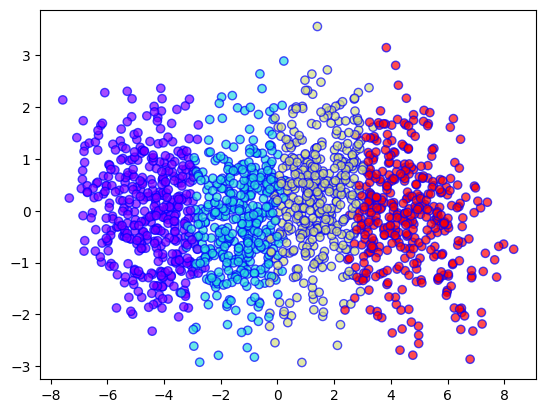

In [22]:
# CLASSES IN THE TRAINING DATA
import matplotlib.pyplot as plt
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)

 # RANDOM FOREST CLASSIFIER 

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 2, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 1, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 3, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 2, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 1, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 1, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       3, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 2, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [25]:
rfc.score(X_train,y_train)

1.0

In [26]:
rfc.score(X_test,y_test)

0.96

# CLASSIFICATION REPORT 


In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.95      0.99      0.97        91
           2       0.93      0.92      0.93        92
           3       0.96      0.96      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



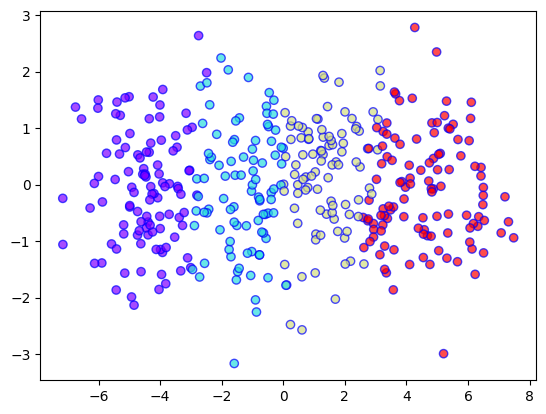

In [28]:
# CLASSES IN TESTING DATA
import matplotlib.pyplot as plt
plt.scatter(
    X_test[:, 0], X_test[:, 1],
    c=y_test,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)

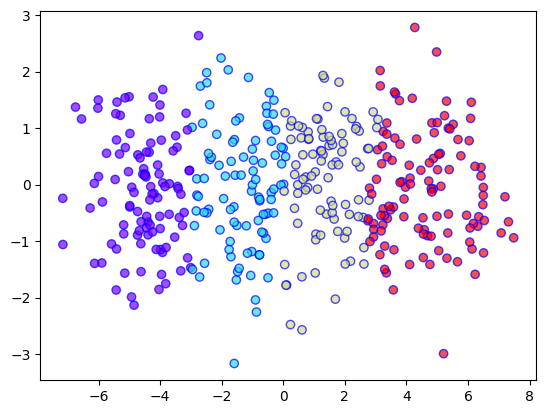

In [29]:
# CLASSES IN PREDICTED TARGET LABEL
import matplotlib.pyplot as plt
plt.scatter(
    X_test[:, 0], X_test[:, 1],
    c=y_pred,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)